In [1]:
from spectral import *
import spectral.io.envi as envi
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi




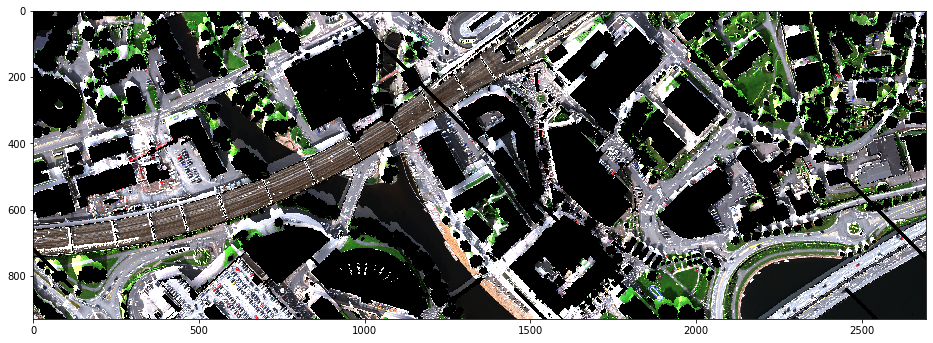

In [3]:
image = envi.open('../../hyperImage/reflectance/09_VNIR_ROAD_MASKED.hdr', '../../hyperImage/reflectance/09_VNIR_ROAD_MASKED.')
img = image.load()
view = imshow(img, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)), figsize=(16, 16))

In [4]:
img.shape

(930, 2694, 186)

In [ ]:
wavelength=envi.read_envi_header('../hyperImage/reflectance/09_VNIR_ROAD_MASKED.hdr')["band names"]

In [ ]:
#compute PCA on the image 
pc = principal_components(image)
pc_0999 = pc.reduce(fraction=0.999)
img_pc = pc_0999.transform(image)
img_pc.shape

In [ ]:
ev = pc_0999.eigenvalues

In [ ]:
plt.bar([i for i in range(1, 7)],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
pc=[]
for i in range(6):
    pc.append('PC'+str(i+1))
#plt.xticks([1,2,3,4,5,6,7,8,9,10],pc, fontsize=8, rotation=30)
plt.xticks([i for i in range(1,21)],pc, fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of  Dataset')
plt.show()

In [ ]:
#NDVI calculation of the image 
vi = ndvi(image, 76, 105)
data_ndvi = np.nan_to_num(vi)

In [ ]:
pc_img = img_pc.load()

# PCA visualization

In [ ]:
loading = pc_0999.eigenvectors
loading.shape

In [ ]:
# plotting the first 5 loadings
plt.figure(figsize=(10,10))
plt.plot(wavelength,loading[:,0], lw=3);
plt.xlabel('Wavelength [nm]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.legend(['PC' + str(i) for i in range(1,6)], fontsize=14);
plt.title('Loading image PC 1');
plt.grid()
# first PC: pretty close to reality, only NIR slightly enhanced
plt.figure(figsize=(10,10))
plt.imshow(img_pc[:,:,0], vmin=-0.07, vmax=0.2)
plt.title('score image PC 1');

In [ ]:
# second PC: vegetation enhanced
plt.figure(figsize=(10,10))
plt.plot(wavelength,loading[:,1], lw=3);
plt.xlabel('Wavelength [nm]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.legend(['PC' + str(i) for i in range(1,6)], fontsize=14);
plt.title('Loading image PC 2');
plt.grid()
plt.figure(figsize=(10,10))
plt.imshow(img_pc[:,:,1], vmin=-0.3, vmax=0.2)
plt.title('score image PC 2');

In [ ]:
# third PC
plt.figure(figsize=(10,10))
plt.plot(wavelength,loading[:,2], lw=3);
plt.xlabel('Wavelength [nm]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.legend(['PC' + str(i) for i in range(1,6)], fontsize=14);
plt.title('Loading image PC 3');
plt.grid()
plt.figure(figsize=(10,10))
plt.imshow(img_pc[:,:,2], vmin=-0.03, vmax=0.03)
plt.title('score image PC 3');

In [ ]:
# fourth PC
plt.figure(figsize=(10,10))
plt.plot(wavelength,loading[:,3], lw=3);
plt.xlabel('Wavelength [nm]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.legend(['PC' + str(i) for i in range(1,6)], fontsize=14);
plt.title('Loading image PC 4');
plt.grid()
plt.figure(figsize=(10,10))
plt.imshow(img_pc[:,:,3], vmin=-0.01, vmax=0.013)
plt.title('score image PC 4');

In [ ]:
# fifth PC
plt.figure(figsize=(10,10))
plt.plot(wavelength,loading[:,4], lw=3);
plt.xlabel('Wavelength [nm]', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.legend(['PC' + str(i) for i in range(1,6)], fontsize=14);
plt.title('Loading image PC 5');
plt.grid()
plt.figure(figsize=(10,10))
plt.imshow(img_pc[:,:,4], vmin=-0.01, vmax=0.01)
plt.title('score image PC 5');

In [ ]:
img_pcc = img_pc[:,:,:3]
img_pcc.shape

In [ ]:
## Combine PCA,and ndvi DATA
df_pca = pd.DataFrame(img_pcc.reshape(-1, img_pcc.shape[2]))
string = "PC"
df_pca.columns = [string + str(n) for n in range(1, img_pcc.shape[2]+1)]
df_ndvi = pd.DataFrame(data_ndvi.reshape(-1, 1))
string = "NDVI"
df_ndvi.columns = [string]
#Concatenate 3 dataframe 
main_df = pd.concat([df_pca, df_ndvi], axis=1, sort=False)

In [ ]:
main_df.to_csv('../hyperImage/csv/features/hsi_features.csv', index=False)

In [6]:
main_df = pd.read_csv('../hyperImage/csv/features/hsi_features.csv')

In [7]:
main_df

PC1         PC2        PC3      NDVI
0       -10484.345065  502.798155  88.399638  0.000000
1       -10484.345065  502.798155  88.399638  0.000000
2       -10484.345065  502.798155  88.399638  0.000000
3       -10484.345065  502.798155  88.399638  0.000000
4       -10484.345065  502.798155  88.399638  0.000000
...               ...         ...        ...       ...
2505415  -9499.123350   44.434243 -22.573267 -0.191489
2505416  -9608.590817   62.650549 -25.793413 -0.200000
2505417  -9588.385036   55.711763 -24.928635 -0.194030
2505418  -9599.751759   58.201811 -25.912694 -0.196970
2505419  -9672.702881  -19.330094 -19.495562 -0.229630

[2505420 rows x 4 columns]

In [8]:
## Class image
gt_data = Image.open('../hyperImage/reflectance/roi/class4.tif')

gt = np.array(gt_data)
gt.shape

(930, 2694)

In [9]:
np.unique(gt)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [10]:
df_class = pd.DataFrame(gt.reshape(-1, 1))
string = "Target"
df_class.columns = [string]
df_class.shape

(2505420, 1)

# Using only hyperspectral data 

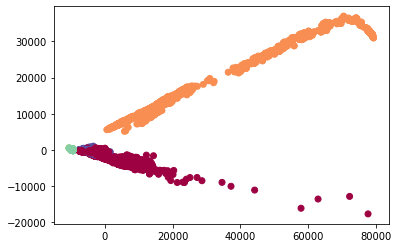

In [11]:
df = pd.concat([main_df, df_class], axis=1, sort=False)
df_masked = df[(df[['Target']] != 0).all(axis=1)]
X = df_masked.drop(columns=['Target']).values
y = df_masked['Target'].values
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')
plt.show()

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1496.0]
    G: [0.0, 1380.0]
    B: [0.0, 1085.0]
>

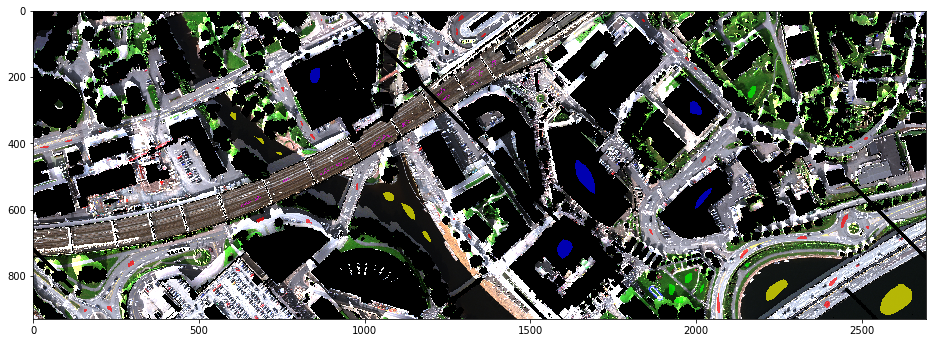

In [12]:
view = imshow(img, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)), figsize=(16, 16), classes=gt)
view.set_display_mode('overlay')
view.class_alpha = 0.7
view.show_data

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=0)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [6, 7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [15]:
random_forest = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=4, n_jobs= -1)
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)
accuracy_score(y_test, pred)

0.9993093922651933

In [16]:
random_forest2 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=4, n_jobs= -1)
random_forest2.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [17]:
X_data = df.drop(columns=['Target']).values
X_data_scaled = scaler.transform(X_data)

In [18]:
y_pred = random_forest2.predict(X_data_scaled)

In [19]:
predicted_hsi_mask = y_pred.reshape(img.shape[0], img.shape[1])

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1496.0]
    G: [0.0, 1380.0]
    B: [0.0, 1085.0]
>

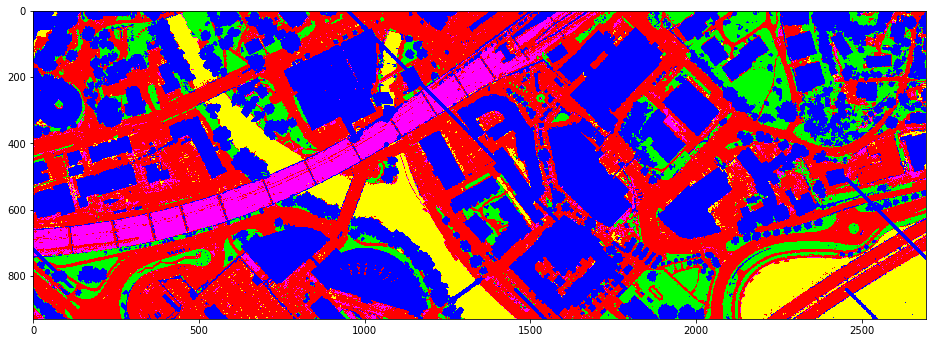

In [20]:
#full_image = envi.open('../hyperImage/reflectance/09_VNIR_POLISHED.hdr', '../hyperImage/reflectance/09_VNIR_POLISHED')
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_mask)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

In [ ]:
import scipy as sp


# Convenient functions
def compute_energy(proba,classes,beta):
    """
    The function compute the spatial energy terms of the Potts model
    classes: a 3x3 array containing the labels, the considered pixels is in the "middle" classes[1,1]
    proba:  the conditional probabilities of the considered pixels
    beta: the weight parameter
    """

    # Potts model
    count = (classes!=classes[1,1]).sum()

    # Add spectral and spatial energy
    energy = proba + beta*count

    return energy

# Main function
def icm_fit(proba,labels,beta=4,th=0.000001):
    """
    """
    # Get some parameters and do initialization
    diff = [1]
    niter = 0
    [nl,nc,C]=proba.shape

    # Iterate until convergence
    while (diff[-1] > th) and (niter < 100):
        old_labels= labels.copy() # Make a copy of the old labels
        for i in range(1,nl-1): # Scan each line
            for j in range(1,nc-1): # Scan each column
                energy = []
                labels_ = old_labels[i-1:i+2,j-1:j+2].copy()
                for c in range(C): # Compute the energy for the different classes
                    labels_[1,1] = c+1
                    energy.append(compute_energy(proba[i,j,c],labels_,beta))
                arg = sp.argmin(energy) # Get the maximum energy term for the local configuration
                labels[i,j] = arg + 1
        diff.append(1 - sp.sum(old_labels == labels ).astype(float)/nc/nl) # Compute the changes
        niter += 1
    # Clean data
    del old_labels
    return labels

In [ ]:
proba = -random_forest2.predict_log_proba(X_data_scaled).reshape(img.shape[0], img.shape[1],y.max())


In [ ]:
new_labels = icm_fit(proba,predicted_hsi_mask,beta=1.25,th=0.01)

In [ ]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=new_labels)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

In [ ]:
road = (predicted_hsi_mask == 1).astype(int)

In [ ]:
from skimage.feature import canny
from skimage.viewer import ImageViewer
from skimage import io
from skimage import img_as_uint
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.3,
)
viewer = ImageViewer(edges)
viewer.show()
road_edges = edges.astype(int)


In [ ]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

# Using Lidar Data Only

In [23]:
#import lidar dem and intensity image 
l_intensity_data = Image.open('../hyperImage/reflectance/roi/masked_intensity.tif')
l_intensity = np.array(l_intensity_data)
df_intensity = pd.DataFrame(l_intensity.reshape(-1, 1))
string = "Lidar Intensity"
df_intensity.columns = [string]

l_dsm_data = Image.open('../hyperImage/reflectance/roi/masked_nDSM.tif')
l_dsm = np.array(l_dsm_data)
df_dsm = pd.DataFrame(l_dsm.reshape(-1, 1))
string = "Lidar nDSM"
df_dsm.columns = [string]

In [24]:
df_lidar = pd.concat([df_intensity, df_dsm, df_class], axis=1, sort=False)
df_lidar_masked =  df_lidar[(df_lidar[['Target']] != 0).all(axis=1)]
X = df_lidar_masked.drop(columns=['Target']).values
y = df_lidar_masked['Target'].values

In [25]:
df_dsm.shape

(2505420, 1)

In [26]:
scaler1 = MinMaxScaler()
scaler1.fit(X)
X_scaled = scaler1.transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=0)

In [28]:
random_forest2 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest2.fit(X_train, y_train)
pred = random_forest2.predict(X_test)
accuracy_score(y_test, pred)

0.7907458563535912

In [29]:
random_forest3 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest3.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [30]:
X_lidar_data = df_lidar.drop(columns=['Target']).values
S_lidar_data_scaled = scaler1.transform(X_lidar_data)
y_pred_lidar = random_forest3.predict(S_lidar_data_scaled)
predicted_lidar_mask = y_pred_lidar.reshape(930, 2694)

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1496.0]
    G: [0.0, 1380.0]
    B: [0.0, 1085.0]
>

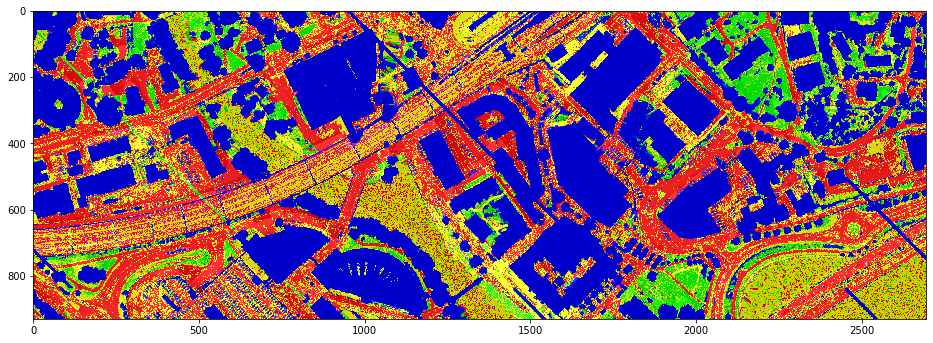

In [31]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_lidar_mask)
view.set_display_mode('overlay')
view.class_alpha = 0.8
view.show_data

In [32]:
proba = -random_forest3.predict_log_proba(S_lidar_data_scaled).reshape(img.shape[0], img.shape[1],y.max())



/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:635: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [33]:
road = (predicted_lidar_mask == 3).astype(int)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.3,
)

road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "
/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1496.0]
    G: [0.0, 1380.0]
    B: [0.0, 1085.0]
>

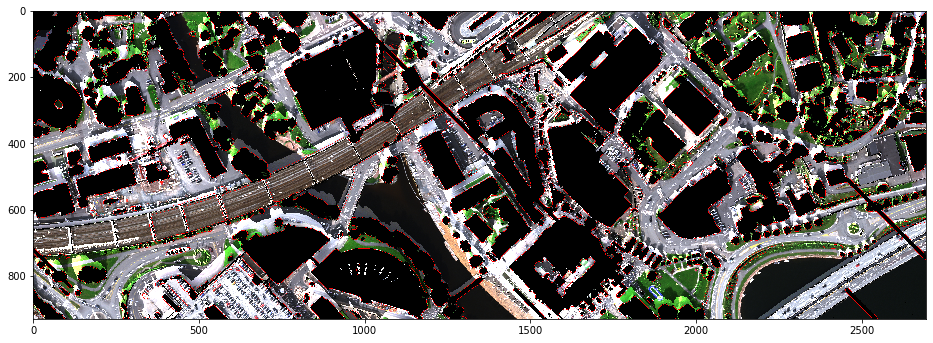

In [35]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

# Using  hyperspectral and lidar data 

In [36]:
#merge with HSI dataframe and lidar dataframe

In [37]:
df_lid_hsi = pd.concat([main_df, df_intensity, df_dsm, df_class], axis=1, sort=False)

In [38]:
df_masked =  df_lid_hsi[(df_lid_hsi[['Target']] != 0).all(axis=1)]
X = df_masked.drop(columns=['Target']).values
y = df_masked['Target'].values

In [39]:
scaler3 = MinMaxScaler()
scaler3.fit(X)
X_scaled = scaler3.transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=0)
random_forest3 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest3.fit(X_train, y_train)
pred = random_forest3.predict(X_test)
accuracy_score(y_test, pred)

0.9991942909760589

In [41]:
random_forest3 = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth = 110, min_samples_leaf= 3,
                                       min_samples_split=8, max_features=0.25, n_jobs= -1)
random_forest3.fit(X_scaled, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
X_data = df_lid_hsi.drop(columns=['Target']).values
X_data_scaled = scaler3.transform(X_data)

In [43]:
y_pred = random_forest3.predict(X_data_scaled)

In [44]:
predicted_hsi_lidar_mask = y_pred.reshape(930, 2694)

In [45]:
road = (predicted_hsi_lidar_mask == 1).astype(int)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.4,
)
road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1496.0]
    G: [0.0, 1380.0]
    B: [0.0, 1085.0]
>

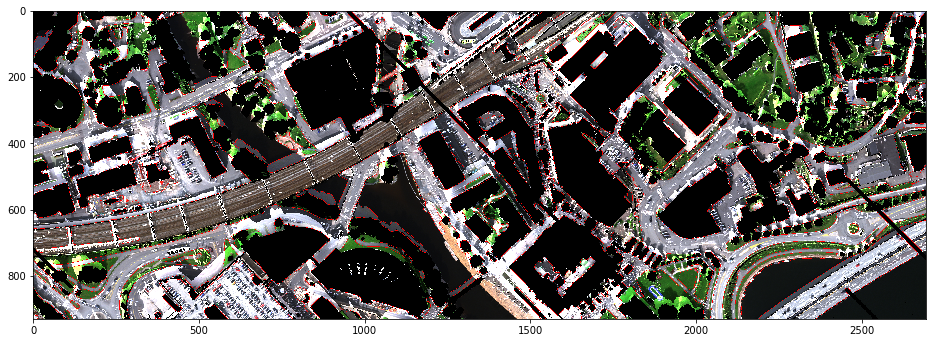

In [47]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road_edges)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1496.0]
    G: [0.0, 1380.0]
    B: [0.0, 1085.0]
>

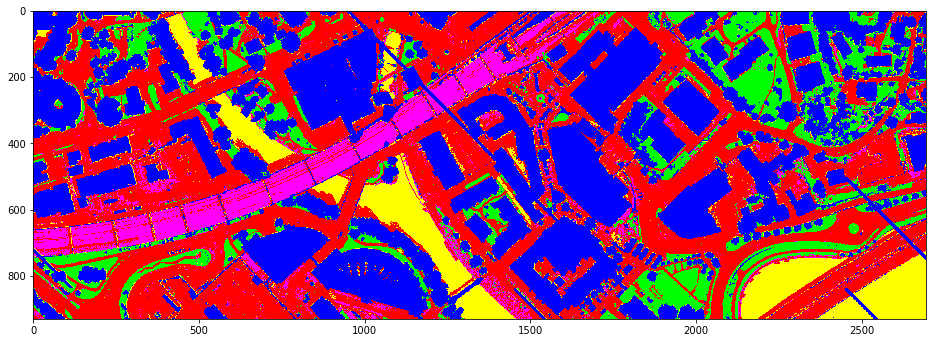

In [48]:
view = imshow(image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_lidar_mask)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data

# Validation data

In [65]:
val_image = envi.open('../hyperImage/reflectance/vnir/08_clippped_road.hdr', '../hyperImage/reflectance/vnir/08_clippped_road.')
val_img = val_image.load()
val_img.shape

(799, 2296, 186)

In [50]:
#compute PCA on the image 
pc = principal_components(image)
pc_0999 = pc.reduce(fraction=0.999)
val_img_pc = pc_0999.transform(val_image)
val_img_pc.shape

Covariance.....  0.0Covariance.....  0.0Covariance.....done  


(799, 2296, 6)

In [51]:
#NDVI calculation of the image 
vi = ndvi(val_image, 76, 105)
data_ndvi = np.nan_to_num(vi)

/opt/anaconda3/lib/python3.7/site-packages/spectral/algorithms/algorithms.py:1216: RuntimeWarning: invalid value encountered in true_divide
  return (n - r) / (n + r)


In [52]:
l_intensity_data = Image.open('../hyperImage/reflectance/vnir/intensity.tif')
l_intensity = np.array(l_intensity_data)
df_intensity = pd.DataFrame(l_intensity.reshape(-1, 1))
string = "Lidar Intensity"
df_intensity.columns = [string]

l_dsm_data = Image.open('../hyperImage/reflectance/vnir/nDSM.tif')
l_dsm = np.array(l_dsm_data)
df_dsm = pd.DataFrame(l_dsm.reshape(-1, 1))
string = "Lidar nDSM"
df_dsm.columns = [string]

In [53]:
pc_img = val_img_pc[:,:,:3]
pc_img.shape

(799, 2296, 3)

In [54]:
## Combine PCA,and ndvi DATA
df_pca = pd.DataFrame(pc_img.reshape(-1, pc_img.shape[2]))
string = "PC"
df_pca.columns = [string + str(n) for n in range(1, pc_img.shape[2]+1)]
df_ndvi = pd.DataFrame(data_ndvi.reshape(-1, 1))
string = "NDVI"
df_ndvi.columns = [string]
#Concatenate 3 dataframe 
main_df = pd.concat([df_pca, df_ndvi], axis=1, sort=False)

In [55]:
df_lid_hsi = pd.concat([main_df, df_intensity, df_dsm], axis=1, sort=False)

In [56]:
df_lid_hsi

PC1          PC2         PC3      NDVI  Lidar Intensity  \
0       -10484.345065   502.798155   88.399638  0.000000             15.0   
1       -10484.345065   502.798155   88.399638  0.000000             16.0   
2       -10484.345065   502.798155   88.399638  0.000000             14.0   
3       -10484.345065   502.798155   88.399638  0.000000             15.0   
4       -10484.345065   502.798155   88.399638  0.000000             15.0   
...               ...          ...         ...       ...              ...   
1834499   -993.727692 -1130.410607  901.730315 -0.018991             18.0   
1834500    572.654269 -1708.054466  876.050410 -0.013498             25.0   
1834501   1093.990768 -1814.084240  917.140920 -0.013963             16.0   
1834502   -370.617680  -868.101546  772.432134 -0.008360              8.0   
1834503    419.540623  -982.222167  837.524888 -0.010125              6.0   

         Lidar nDSM  
0         29.950001  
1         29.950001  
2         29.969999  
3         29.940001  
4         29.940001  
...             ...  
1834499    0.139999  
1834500    0.139999  
1834501    0.120000  
1834502    0.000000  
1834503    0.000000  

[1834504 rows x 6 columns]

In [57]:
X_data_scaled = scaler3.transform(df_lid_hsi)

In [58]:
val_pred_full = random_forest3.predict(X_data_scaled)

In [59]:
predicted_hsi_lidar_mask_val = val_pred_full.reshape(val_image.shape[0], val_image.shape[1])

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 858.0]
    G: [0.0, 834.0]
    B: [0.0, 632.0]
>

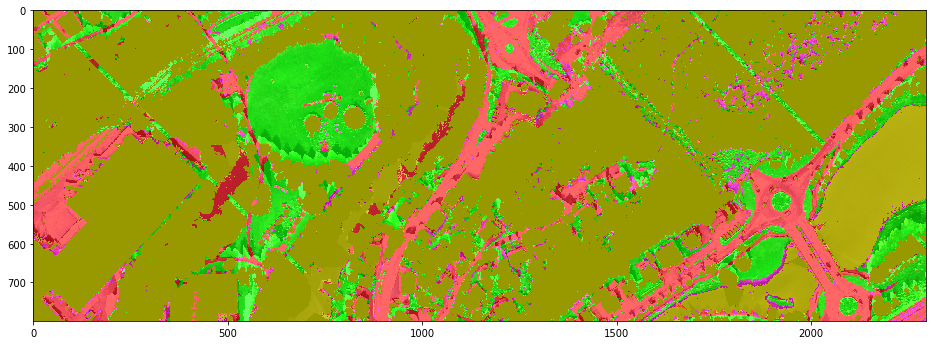

In [60]:
view = imshow(val_image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=predicted_hsi_lidar_mask_val)
view.set_display_mode('overlay')
view.class_alpha = 0.6
view.show_data

In [61]:
road = (predicted_hsi_lidar_mask_val == 1).astype(int)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.viewer import ImageViewer
edges = canny(
    image=road,
    sigma=5.5,
    low_threshold=0.1,
    high_threshold=0.4,
)
road_edges = edges.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [63]:
val_full_image = envi.open('../hyperImage/reflectance/vnir/08_clipped.hdr', '../hyperImage/reflectance/vnir/08_clipped.')

<bound method ImageView.show_data of ImageView object:
  Display bands       :  (76, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [9.0, 1374.0]
    G: [7.0, 1732.0]
    B: [0.0, 822.0]
>

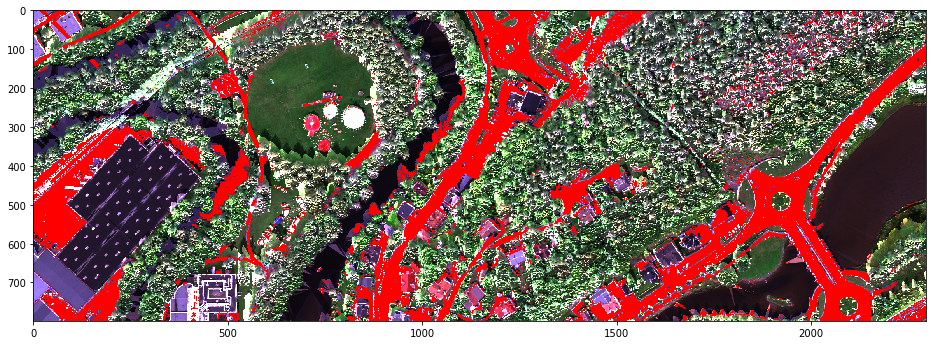

In [64]:
view = imshow(val_full_image, (76, 46, 21), stretch=((0.0, 0.9), (0.0, 0.9), (0.0, 0.9)),figsize=(16, 16), classes=road)
view.set_display_mode('overlay')
view.class_alpha = 1
view.show_data